# Install dependencies

In [0]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 73kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=4c35a7d4848284381d5c507196184beeaa410a2941c3877d51f5cdeb478ddc8d
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


# Import libs

In [0]:
import os
import math
import pickle

import pandas as pd
import face_recognition
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from google.colab import drive
from google.colab.patches import cv2_imshow

# Variables

In [0]:
ROOT_FOLDER = "/content/drive"
BASE_FOLDER = f"{ROOT_FOLDER}/My Drive/pycon_worshop/final"
VIDEOS_FOLDER = f"{BASE_FOLDER}/videos"
FRAMES_FOLDER = f"{BASE_FOLDER}/frames"
MODEL_FOLDER = f"{BASE_FOLDER}/model"

# Mount drive folder(s)

In [0]:
drive.mount(ROOT_FOLDER, force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Functions

In [0]:
def resize_image(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

def recognize_faces_in_image(image):
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    boxes = face_recognition.face_locations(rgb, model="hog")
    encodings = face_recognition.face_encodings(rgb, boxes)

    # initialize the list of names for each face detected
    names = []
    probs = []
    # load the actual face recognition model along with the label encoder
    recognizer = pickle.loads(open(os.path.sep.join(
        [MODEL_FOLDER, "recognizer.pickle"]), "rb").read())
    le = pickle.loads(open(os.path.sep.join(
        [MODEL_FOLDER, "le.pickle"]), "rb").read())
    
    for index, face in enumerate(boxes):
        vec = face_recognition.face_encodings(rgb, [boxes[index]])
        preds = recognizer.predict_proba(vec)[0]
        j = np.argmax(preds)
        proba = preds[j]
        name = le.classes_[j] if proba > 0.1 else "unknown"     
        names.append(name)
        probs.append(proba)
        

    # loop over the recognized faces
    for ((top, right, bottom, left), name, prob) in zip(boxes, names, probs):
        # draw the predicted face name on the image
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        y = top - 15 if top - 15 > 15 else top + 15
        label = f"{name} prob : {round(prob, 3)*100}%"
        cv2.putText(image, label, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 255, 0), 2)    

    return image

#Recognition function



In [0]:
model_path = os.path.join(MODEL_FOLDER, "embeddings.pickle")
data_embbeding=pickle.loads(open(model_path, "rb").read())

model_path_le = os.path.join(MODEL_FOLDER, "le.pickle")
data_le=pickle.loads(open(model_path_le, "rb").read())

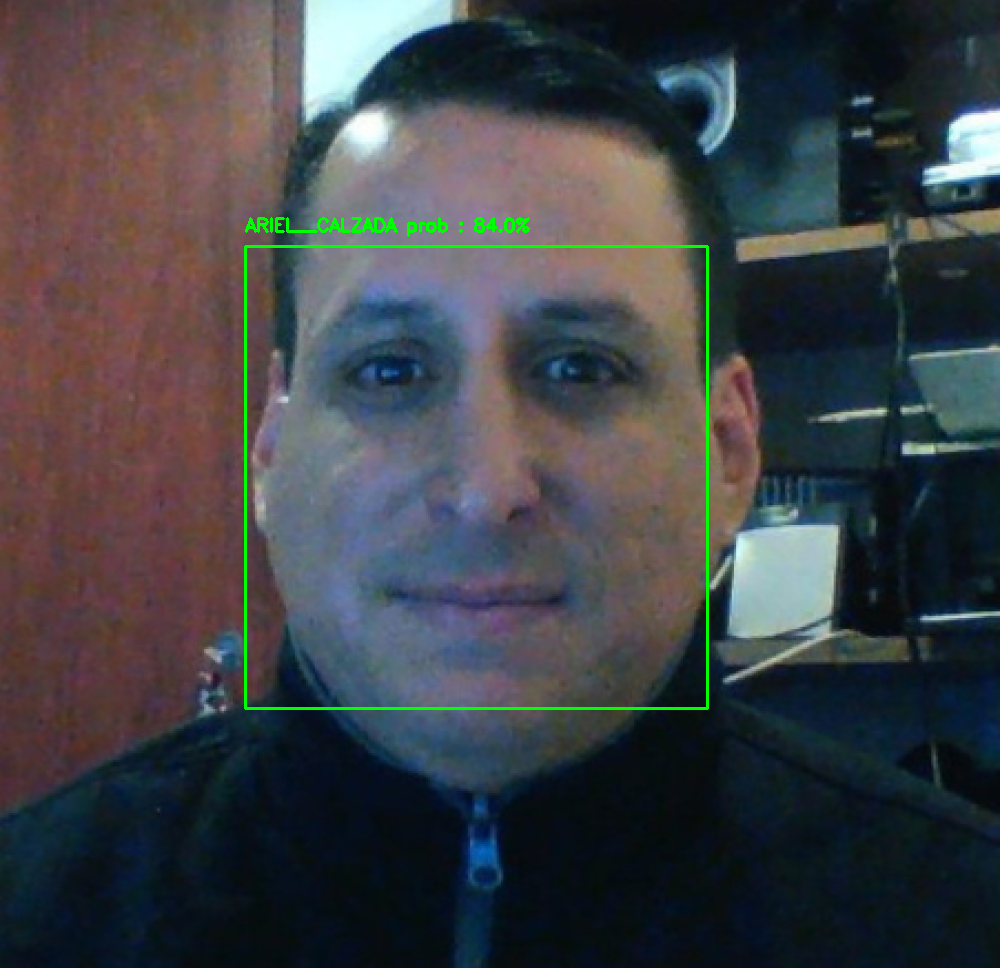

In [30]:
image_path = os.path.join(BASE_FOLDER, 'frames/ARIEL__CALZADA/ariel.png')
image = cv2.imread(image_path)
image = resize_image(image, 1000)
image = recognize_faces_in_image(image)
image
cv2_imshow(image)